In [1]:
import pandas as pd 

import numpy as np

import os
import torchvision as tv
from PIL import Image

from sklearn.model_selection import train_test_split
import gc

import torch

# import tensorflow
import matplotlib.pyplot as plt

In [2]:
import pandas as pd 

In [3]:
train_data=pd.read_csv("C:/Users/yashv/OneDrive/Desktop/project/archive (3)/Train.csv")
train_data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [4]:
import numpy as np

In [5]:
data=[]
labels=[]
path="C:\\Users\\yashv\\OneDrive\\Desktop\\project\\archive (3)\\Train"
classes=43
target_size=(64,64)

In [6]:
import os
import torchvision as tv
from PIL import Image

In [7]:
# interating through the classes
n=[]
for folder in range (classes):
# joining the path with the folder(eg: "c:/archive/train" + "0")
#should conver the floder as string as it was the integer
    folder_dir=os.path.join(path,str(folder))
# collect all the images in the floder and stores it as list
    images_name=os.listdir(folder_dir)
# the enumurator function stores the img with the no as dictionary
    for i,img in enumerate(images_name):
        img_path=os.path.join(folder_dir,img)
        opened_image=Image.open(img_path)
        resized_image=opened_image.resize(target_size)
# The tensor shape will be [C, H, W], where C is the number of channels (e.g., 3 for RGB images), 
# H is the height, and W is the width.
        tensor_image=tv.transforms.ToTensor()(resized_image)
        data.append(tensor_image.numpy())
        labels.append(folder)
    # print("folder of label",folder,"image loaded. Number of sample ",i+1)
    n.append(i)    

data=np.array(data)
labels=np.array(labels)

In [8]:
print (data.shape)
# print(n)

(39209, 3, 64, 64)


<Axes: xlabel='no_data', ylabel='categories'>

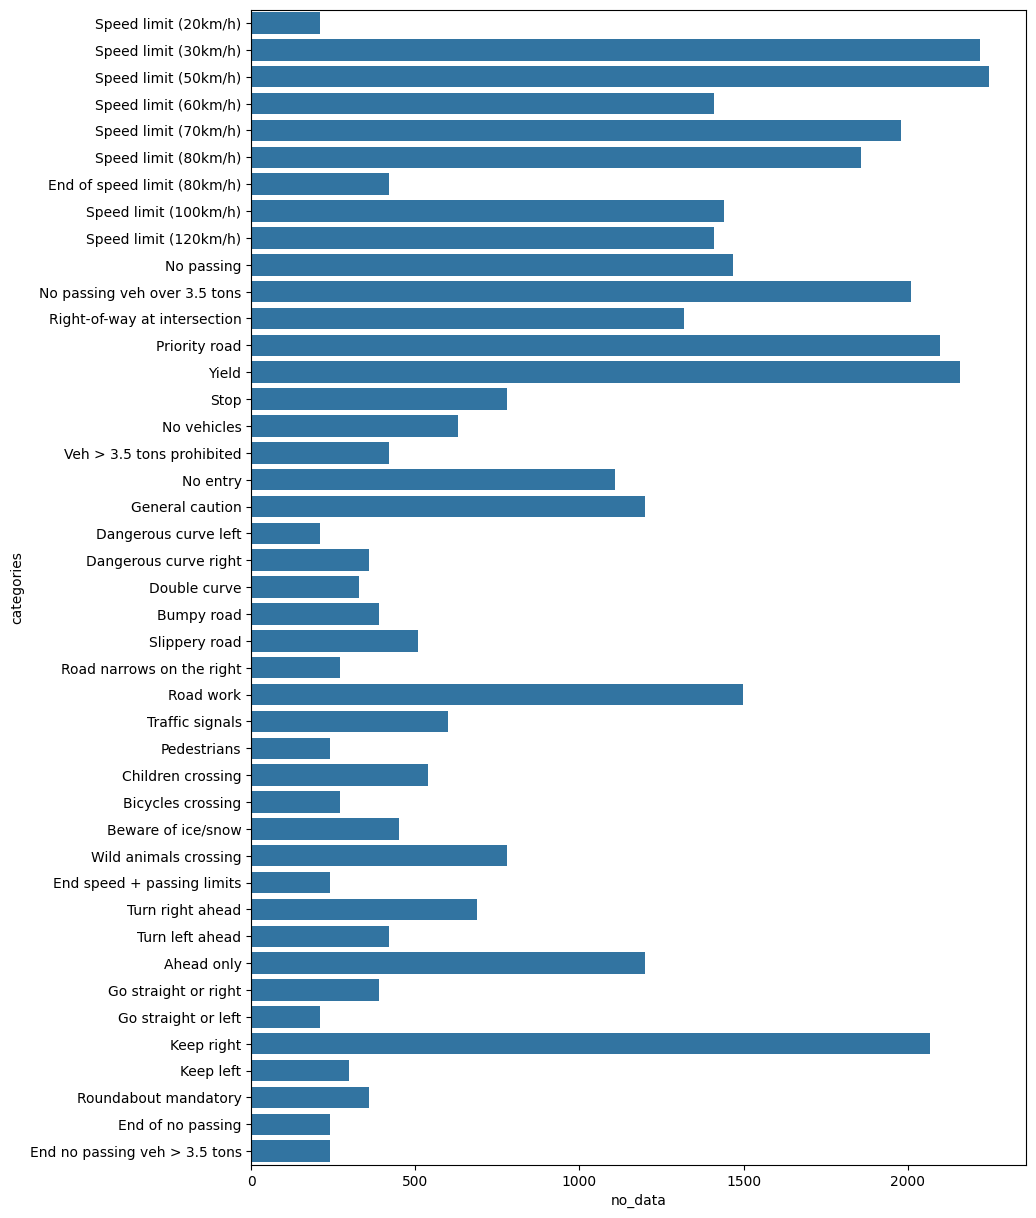

In [9]:
classes = { 0:'Speed limit (20km/h)',
 1:'Speed limit (30km/h)',
 2:'Speed limit (50km/h)',
 3:'Speed limit (60km/h)',
 4:'Speed limit (70km/h)',
 5:'Speed limit (80km/h)',
 6:'End of speed limit (80km/h)',
 7:'Speed limit (100km/h)',
 8:'Speed limit (120km/h)',
 9:'No passing',
 10:'No passing veh over 3.5 tons',
 11:'Right-of-way at intersection',
 12:'Priority road',
 13:'Yield',
 14:'Stop',
 15:'No vehicles',
 16:'Veh > 3.5 tons prohibited',
 17:'No entry',
 18:'General caution',
 19:'Dangerous curve left', 
 20:'Dangerous curve right',
 21:'Double curve',
 22:'Bumpy road',
 23:'Slippery road',
 24:'Road narrows on the right',
 25:'Road work',
 26:'Traffic signals',
 27:'Pedestrians',
 28:'Children crossing',
 29:'Bicycles crossing',
 30:'Beware of ice/snow',
 31:'Wild animals crossing',
 32:'End speed + passing limits',
 33:'Turn right ahead',
 34:'Turn left ahead',
 35:'Ahead only',
 36:'Go straight or right',
 37:'Go straight or left',
 38:'Keep right',
 39:'Keep left',
 40:'Roundabout mandatory',
 41:'End of no passing',
 42:'End no passing veh > 3.5 tons' }

import seaborn as sns

classes=list(classes.values())
plt.figure(figsize=(10, 15))
df=pd.DataFrame({'categories':classes,'no_data':n})
sns.barplot(data=df,x="no_data",y="categories",orient="y")

In [10]:
os.getcwd()

'C:\\Users\\yashv\\OneDrive\\Desktop\\srmMiniProject'

In [11]:
# np.save("C:\\Users\\yashv\\OneDrive\\Desktop\\project\\archive (3)",data)
# np.save("C:\\Users\\yashv\\OneDrive\\Desktop\\project\\archive (3)",labels)

In [12]:
print(data.shape, labels.shape)

(39209, 3, 64, 64) (39209,)


In [13]:
unique_elements, counts = np.unique(labels, return_counts=True)

print("Unique elements:", unique_elements)
print("Counts:", counts)


Unique elements: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Counts: [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160
  780  630  420 1110 1200  210  360  330  390  510  270 1500  600  240
  540  270  450  780  240  689  420 1200  390  210 2070  300  360  240
  240]


In [14]:
from sklearn.model_selection import train_test_split
# garbage collection moduel for automatic memory managment memory
import gc

In [15]:
# Spliting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)
# deleting the data and labeelsfrom the memory . it's no longer needed
# del data,labels
# triggering the garbege collector moduel to free up the memeory that is no longer in use
# gc.collect()


In [16]:
# checking the shape of the train and test sets

print("shape of x_train : ",x_train.shape)
print("shape of x_test : ",x_test.shape)
print("shape of y_train: ",y_train.shape)
print("shape of y_test : ",y_test.shape)

shape of x_train :  (31367, 3, 64, 64)
shape of x_test :  (7842, 3, 64, 64)
shape of y_train:  (31367,)
shape of y_test :  (7842,)


In [17]:
import matplotlib.pyplot as plt
import torchvision.utils as tv_utils


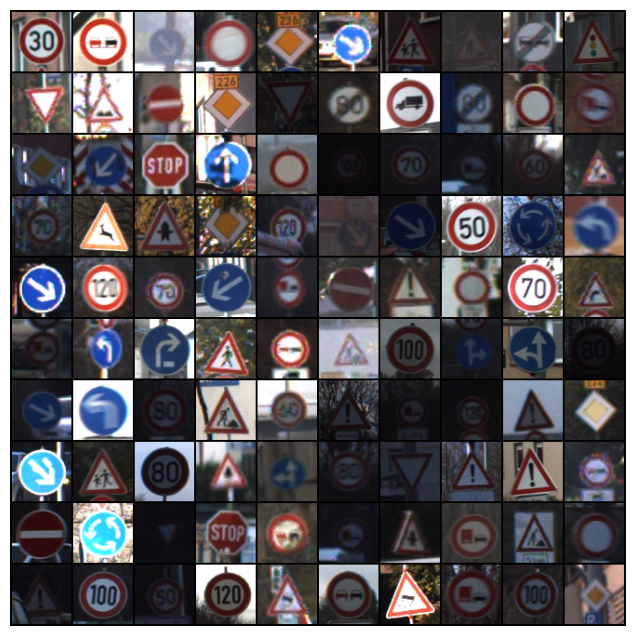



 labels of the above images: 

[ 1  9 38 15 12 38 28 25 41 26 13 22 17 12 13  6 16  6 15 10 12 39 14 35
 15  7  4 10  3 25  4 31 11 12  8 38 38  2 40 34 38  8  4 39 10 17 18 15
  4 20 10 34 33 27  9 25  7 36 37  5 38 34  5 25  3 18 10  8 18 12 38 28
  5 11 37  5 13 18 18  9 17 40 13 14  9 10 11 10 25 15 18  7  2  8 23  9
 23 10  7 12]


In [18]:
plt.figure(figsize=(8,8))
plt.imshow(tv_utils.make_grid(torch.tensor(x_train[:100]),nrow=10).permute(1,2,0))
plt.axis('off')
plt.show()
print("\n\n labels of the above images: \n")
print(y_train[:100])

In [19]:
import torch
import torch.nn as nn
import torchsummary as ts

In [20]:
# Define the model
model = nn.Sequential(
    # 1st convolutional network Layers
    nn.Conv2d(3, 16, (2, 2), (1, 1), padding='same'), # Convolution
    nn.BatchNorm2d(16), # Normalization 
    nn.ReLU(True), # Activation
    nn.MaxPool2d((2, 2)), # Pooling
    # 2nd convolutional network Layers
    nn.Conv2d(16, 32, (2, 2), (1, 1), padding='same'), # Convolution
    nn.BatchNorm2d(32), # Normalization 
    nn.ReLU(True), # Activation
    nn.MaxPool2d((2, 2)), # Pooling
    # 3rd convolutional network Layers
    nn.Conv2d(32, 64, (2, 2), (1, 1), padding='same'), # Convolution
    nn.BatchNorm2d(64), # Normalization 
    nn.ReLU(True), # Activation
    nn.MaxPool2d((2, 2)), # Pooling
    # Flatten Data
    nn.Flatten(), # Flatten
    # Feed forward Layers
    nn.Linear(64*8*8, 256), # Linear 
    nn.ReLU(True), # Activation
    nn.Linear(256, 43) # Linear
)


In [21]:
print(model)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=same)
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=same)
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU(inplace=True)
  (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=same)
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU(inplace=True)
  (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=4096, out_features=256, bias=True)
  (14): ReLU(inplace=True)
  (15): Linear(in_features=25

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [23]:
model = model.to(device)
# Print the model summary
ts.summary(model, (3, 64, 64))

C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\torch\nn\modules\conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1004.)
  return F.conv2d(input, weight, bias, self.stride,


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             208
       BatchNorm2d-2           [-1, 16, 64, 64]              32
              ReLU-3           [-1, 16, 64, 64]               0
         MaxPool2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           2,080
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]           8,256
      BatchNorm2d-10           [-1, 64, 16, 16]             128
             ReLU-11           [-1, 64, 16, 16]               0
        MaxPool2d-12             [-1, 64, 8, 8]               0
          Flatten-13                 [-1, 4096]               0
           Linear-14                  [

In [24]:
import torchvision.models as models
from torch.utils.data import DataLoader, TensorDataset

In [25]:
import torch.optim as optim

# Define loss function (CrossEntropyLoss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define optimizer (using Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [26]:
# Training function
def train(model, device, train_loader, optimizer, criterion, epochs=10):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        # Print loss and accuracy for the current epoch
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

print("n")

n


In [27]:
# Testing function
def test(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation for testing
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    # Print test accuracy
    print(f'Test Accuracy: {100 * correct / total:.2f}%')


In [28]:
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
train_dataset = TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).long())
test_dataset = TensorDataset(torch.tensor(x_test).float(), torch.tensor(y_test).long())

# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [29]:
# Train the model
train(model, device, train_loader, optimizer, criterion, epochs=10)

# Save the trained model after training
torch.save(model.state_dict(), 'traffic_sign_model.pth')

# Test the model
test(model, device, test_loader)


Epoch [1/10], Loss: 0.7164, Accuracy: 80.17%
Epoch [2/10], Loss: 0.0887, Accuracy: 97.47%
Epoch [3/10], Loss: 0.0539, Accuracy: 98.48%
Epoch [4/10], Loss: 0.0297, Accuracy: 99.13%
Epoch [5/10], Loss: 0.0230, Accuracy: 99.35%
Epoch [6/10], Loss: 0.0256, Accuracy: 99.33%
Epoch [7/10], Loss: 0.0254, Accuracy: 99.21%
Epoch [8/10], Loss: 0.0172, Accuracy: 99.43%
Epoch [9/10], Loss: 0.0329, Accuracy: 99.03%
Epoch [10/10], Loss: 0.0148, Accuracy: 99.58%
Test Accuracy: 99.13%


In [30]:
# Load the saved model (make sure the architecture matches)
model.load_state_dict(torch.load('traffic_sign_model.pth'))

# Set the model to evaluation mode for inference
model.eval()

# Function to make predictions and show the label
def predict_and_show_label(model, device, inputs):
    model.eval()  # Set the model to evaluation mode
    inputs = inputs.to(device)
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = outputs.max(1)
    
    # Convert predictions to class names
    predicted_labels = [classes[int(pred)] for pred in predicted]

    return predicted_labels

# Example usage: Predicting for a batch of 10 test images
sample_input = torch.tensor(x_test[:10]).float().to(device)  # Select a batch of 10 images
predicted_labels = predict_and_show_label(model, device, sample_input)

# Display the predictions
print("Predicted traffic signs for the sample input:")
for i, label in enumerate(predicted_labels):
    print(f"Image {i+1}: {label}")


Predicted traffic signs for the sample input:
Image 1: General caution
Image 2: No entry
Image 3: Turn right ahead
Image 4: Road work
Image 5: Yield
Image 6: No passing veh over 3.5 tons
Image 7: Beware of ice/snow
Image 8: No passing veh over 3.5 tons
Image 9: Speed limit (60km/h)
Image 10: Speed limit (30km/h)


In [33]:
from PIL import Image
import torchvision.transforms as transforms

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(64, 64)):
    # Open the image
    img = Image.open(image_path)
    
    # Define the transform: Resize the image, convert to tensor
    transform = transforms.Compose([
        transforms.Resize(target_size),          # Resize to 64x64 (same as training)
        transforms.ToTensor(),                  # Convert to a PyTorch tensor
    ])
    
    # Apply the transform to the image
    img_tensor = transform(img)
    
    # Add batch dimension (because model expects a batch of images)
    img_tensor = img_tensor.unsqueeze(0)
    
    return img_tensor

# Function to predict the label of a custom image
def predict_custom_image(model, device, image_path):
    # Load and preprocess the image
    img_tensor = load_and_preprocess_image(image_path)
    img_tensor = img_tensor.to(device)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Run the model and get the predicted class index
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted_idx = output.max(1)  # Get the index of the highest score
    
    return predicted_idx.item()

# Example usage
image_path = "C:\\Users\\yashv\\OneDrive\\Desktop\\project\\archive (3)\\Test\\00022.png"  # Replace with the path to your image
predicted_class_idx = predict_custom_image(model, device, image_path)

# Print the predicted class index or class label
print(f"Predicted Class Index: {predicted_class_idx}")
print(f"Predicted Class Label: {classes[predicted_class_idx]}")


Predicted Class Index: 9
Predicted Class Label: No passing
